In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as npr
import time

In [2]:
from MetropolisHastings import MetropolisHastings
from ConsensusMH import ConsensusMH
#from FlyMH import FlyMH
from csMALA import csMALA
from likelihood_functions import Norm_lkhd
from likelihood_functions import Norm_2_d_lkhd

[[ 0.          4.        ]
 [ 0.          4.        ]
 [ 0.          4.        ]
 [ 0.          4.        ]
 [ 0.04335348  3.98387189]
 [ 0.04335348  3.98387189]
 [ 0.0873558   3.90646565]
 [ 0.0873558   3.90646565]
 [ 0.03057975  3.82671733]
 [ 0.03057975  3.82671733]
 [ 0.03057975  3.82671733]
 [ 0.08599838  3.71660573]
 [ 0.27005289  3.64783258]
 [ 0.01529248  3.56097832]
 [ 0.09434472  3.49364828]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.04467077  3.31688832]
 [ 0.05379336  3.31596701]
 [ 0.05379336  3.31596701]
 [ 0.05379336  3.31596701]
 [ 0.0401743   3.31524182]
 [ 0.06217557  3.20696517]
 [ 0.06217557  3.20696517]
 [ 0.06217557  3.20696517]
 [ 0.06217557  3.20696517]
 [-0.06288837  3.19620151]
 [-0.06288837  3.19620151]
 [-0.06288837  3.19620151]
 [-0.06288837  3.19620151]
 [-0.06820179  3.16820274]
 [-0.00538656  3.13452954]
 [-0.00538656  3.13452954]
 

/home/fynn/git-repos/bt_MCMC_big_data/MetropolisHastings.py:48: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(self.lkhd[i + 1] - self.lkhd[i])


In [3]:
npr.seed(1)
N = 10000
#dataType = "Gaussian"
dataType = "logNormal"
if dataType == "Gaussian":
    dataset = npr.randn(N)
elif dataType == "logNormal":
    dataset = npr.lognormal(0,1, N)

# We store the mean and std deviation for later reference, they are also the MAP and MLE estimates in this case.
realMean = np.mean(dataset)
realStd = np.std(dataset)
print(f"Mean of dataset = {realMean}")
print(f"Std of dataset = {realStd}")
MAP = np.array([realMean, realStd])

norm_lkhd = Norm_lkhd()

Mean of dataset = 1.6734578765190937
Std of dataset = 2.2995441701932298


In [4]:
def plt_samples(dataset):
    # Create a jointplot with fading datapoints
    sns.jointplot(x=dataset[:, 0], y=dataset[:, 1], kind='hex', cmap='Blues', alpha=1)

    # Show the plot
    plt.show()


In [5]:
def compute_autocorrelation(arr):
    n = len(arr)
    mean = np.mean(arr)
    autocorr = np.correlate(arr - mean, arr - mean, mode='full')
    autocorr = autocorr[n-1:] / autocorr[n-1]
    return autocorr


In [6]:
from scipy.stats import norm

def compute_bvm(data):
    n = len(data)
    mean = np.mean(data)
    std = np.std(data)
    se = std / np.sqrt(n)

    # Compute the Bernstein-Von Mises approximation
    bvm = norm(loc=mean, scale=se)

    return bvm


In [7]:
import numpy as np

def create_sample(data, b, c):
    # Discard the first b of elements
    data = data[b:]

    # Select every c datapoint
    data = data[::c]

    return data

## VanillaMH

In [ ]:
# #Long VanillaMH run
# T = 100000
# norm_lkhd = Norm_lkhd()
# ref_vanillMH = MetropolisHastings(dataset, norm_lkhd)
# ref_vanillMH.run(T,MAP, dataset)
# ref_run = ref_vanillMH.S
# ref_run_mean = np.mean(ref_run[:,0])
# ref_run_std = np.std(ref_run[:,0])
# plt_samples(ref_run)
# print(np.mean(ref_vanillMH.accept))
# print(ref_vanillMH.alpha)

Execution time: 2.991029 seconds


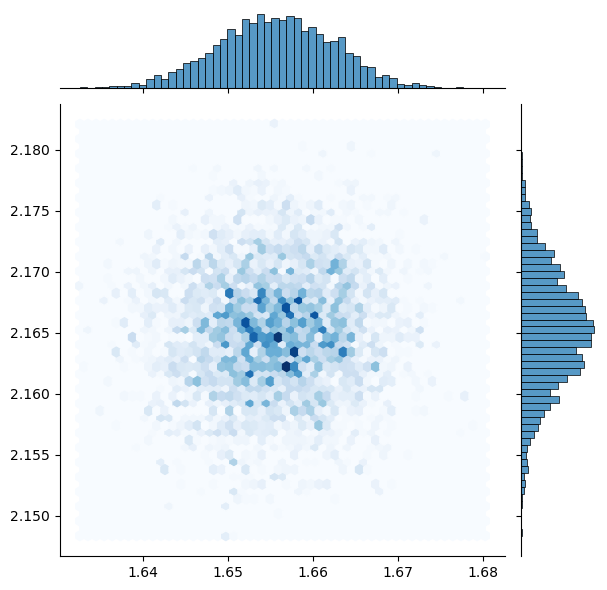

In [7]:
T = 10000
test_vanillMH = MetropolisHastings(dataset, norm_lkhd)

start_time = time.time()
test_vanillMH.run(T, MAP, dataset)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
plt_samples(vanillMH_run)

## ConsensusMH

[array([[1.65566056, 2.16504885],
       [1.65523631, 2.16416684],
       [1.65601474, 2.16449836],
       ...,
       [1.68795107, 2.1468332 ],
       [1.68628094, 2.14536745],
       [1.68810919, 2.1451077 ]]), array([[1.65566056, 2.16504885],
       [1.65581301, 2.1651955 ],
       [1.6562907 , 2.16542342],
       ...,
       [1.64291118, 2.18591409],
       [1.64299705, 2.18593067],
       [1.64505854, 2.1868216 ]]), array([[1.65566056, 2.16504885],
       [1.65368435, 2.16649551],
       [1.65386854, 2.16616899],
       ...,
       [1.6629971 , 2.15659091],
       [1.66239159, 2.15670596],
       [1.66239159, 2.15670596]]), array([[1.65566056, 2.16504885],
       [1.65765413, 2.16415889],
       [1.65765711, 2.1635836 ],
       ...,
       [1.65458118, 2.15411919],
       [1.65504042, 2.15166211],
       [1.6526696 , 2.15094958]])]
Execution time: 4.320444 seconds


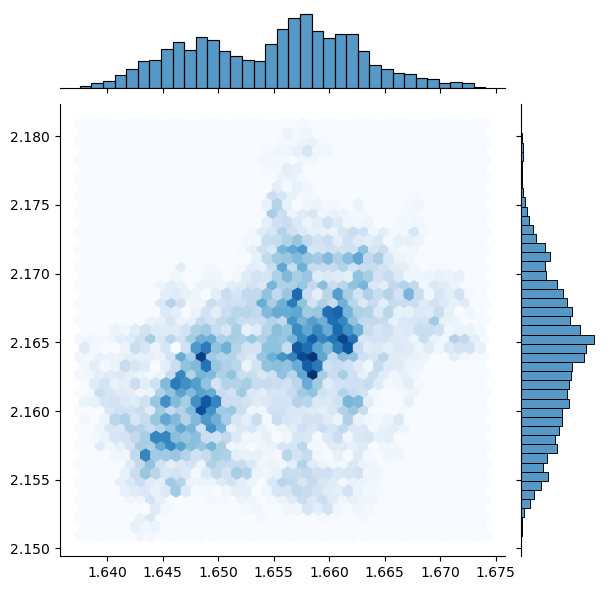

In [ ]:
num_batches = 4
T = 10000

consMH = ConsensusMH(dataset, norm_lkhd, num_batches)

start_time = time.time()
consMH_run = consMH.run(T, MAP)
end_time = time.time()
ex_time_ConsMH = end_time - start_time
print(f"Execution time: {ex_time_ConsMH:.6f} seconds")
plt_samples(consMH_run)

## FlyMH


In [ ]:
# batch_percentage = 0.9
# T = 1000

# test_FlyMH = FlyMH(dataset = x, sample_fraction=batch_percentage)

# start_time = time.time()
# test_FlyMH_run = test_FlyMH.run(T, MAP)
# end_time = time.time()
# ex_time_FLYMH = end_time - start_time
# print(f"Execution time: {ex_time_FLYMH:.6f} seconds")
# plt_samples(test_FlyMH_run)

## MALA


In [8]:
batch_percentage = 1
T = 10000

test_MALA = csMALA(dataset, norm_lkhd, batch_percentage=batch_percentage)
test_MALA.corr_param = 0

start_time = time.time()
test_MALA.run(T, MAP)
end_time = time.time()
ex_time_MALA = end_time - start_time
test_MALA_samples = test_MALA.S
print(f"Execution time: {ex_time_MALA:.6f} seconds")
plt_samples(test_MALA_samples)

TypeError: Likelihood_function.comp_func_grad() takes 1 positional argument but 3 were given

## csMALA

Execution time: 19.484909 seconds


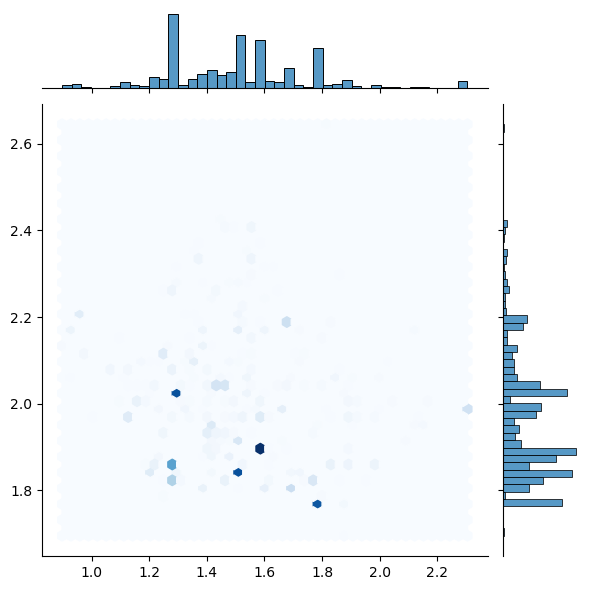

In [ ]:
batch_percentage = 0.1
T = 10000

test_csMALA = csMALA(dataset,norm_lkhd ,batch_percentage=batch_percentage)

start_time = time.time()
test_csMALA.run(T, MAP)
end_time = time.time()
ex_time_csMALA = end_time - start_time
test_csMALA_samples = test_csMALA.S
print(f"Execution time: {ex_time_csMALA:.6f} seconds")
plt_samples(test_csMALA_samples)

## New Dataset

 Try a dataset which consists of two normal distributions with different means
 - How much are the algortihms able to capture the two modes?

(array([  2.,   1.,   3.,   3.,   3.,   3.,   6.,   6.,   3.,   4.,   6.,
         13.,  20.,  15.,  19.,  24.,  26.,  34.,  35.,  33.,  52.,  59.,
         60.,  87.,  93.,  96., 103., 113., 139., 147., 164., 166., 190.,
        228., 202., 242., 212., 235., 273., 283., 284., 303., 251., 312.,
        308., 289., 331., 284., 282., 293., 275., 284., 263., 257., 229.,
        225., 207., 221., 179., 186., 139., 153., 135., 118., 126., 101.,
         77.,  73.,  57.,  57.,  40.,  54.,  30.,  25.,  37.,  24.,  19.,
          6.,  10.,  11.,  11.,   7.,   9.,   1.,   3.,   3.,   2.,   1.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.]),
 array([-0.34514029, -0.33752077, -0.32990125, -0.32228173, -0.31466221,
        -0.30704269, -0.29942317, -0.29180365, -0.28418413, -0.27656461,
        -0.26894508, -0.26132556, -0.25370604, -0.24608652, -0.238467  ,
        -0.23084748, -0.22322796, -0.21560844, -0.20798892, -0.2003694 ,
        -0.19274988, -0.18

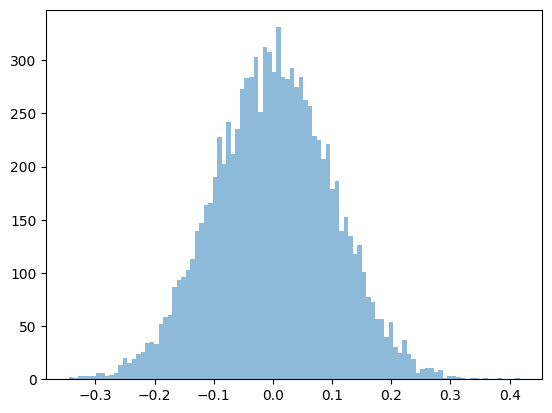

In [8]:
normal = npr.normal(0, 0.1, int(N))
plt.hist(normal, bins=100, alpha=0.5, label='Normal')

(array([  1.,   0.,   0.,   1.,   1.,   3.,   3.,   5.,   9.,  23.,  20.,
         37.,  50.,  54.,  67.,  95., 126., 141., 194., 197., 211., 280.,
        282., 285., 310., 318., 305., 304., 263., 257., 215., 184., 175.,
        111., 108., 103.,  80.,  57.,  40.,  24.,  16.,  20.,  12.,   6.,
          1.,   1.,   2.,   1.,   1.,   2.,   0.,   0.,   0.,   1.,   2.,
          1.,   3.,   2.,   3.,   5.,  10.,  18.,  16.,  26.,  49.,  62.,
         98., 110., 116., 167., 200., 223., 251., 250., 321., 282., 306.,
        285., 346., 257., 285., 251., 205., 184., 161., 110., 102.,  88.,
         52.,  44.,  31.,  23.,  16.,  11.,   6.,   8.,   7.,   1.,   2.,
          2.]),
 array([-3.92751407, -3.77276213, -3.61801019, -3.46325825, -3.30850631,
        -3.15375437, -2.99900243, -2.84425049, -2.68949855, -2.53474661,
        -2.37999467, -2.22524273, -2.07049079, -1.91573885, -1.76098691,
        -1.60623497, -1.45148303, -1.29673109, -1.14197915, -0.98722721,
        -0.83247527, -0.67

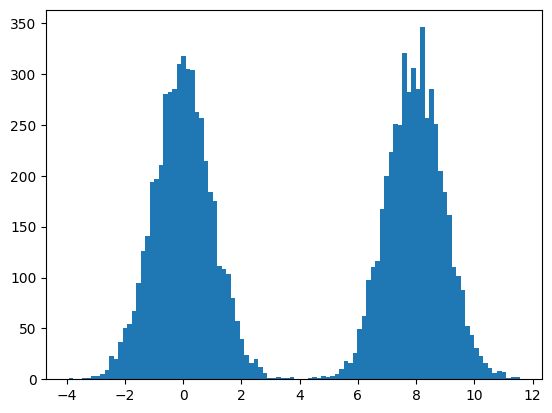

In [9]:
p =1/2
mu1 = 0
mu2 =8
N=10000
mu1_normal = npr.normal(mu1, 1, int(N/2))
mu2_normal = npr.normal(mu2, 1, int(N/2))

bimodal_data = np.concatenate((mu1_normal, mu2_normal))

plt.hist(bimodal_data, bins=100)

/home/fynn/git-repos/bt_MCMC_big_data/MetropolisHastings.py:48: RuntimeWarning: overflow encountered in exp
  alpha = np.exp(self.lkhd[i + 1] - self.lkhd[i])


Execution time: 7.374367 seconds


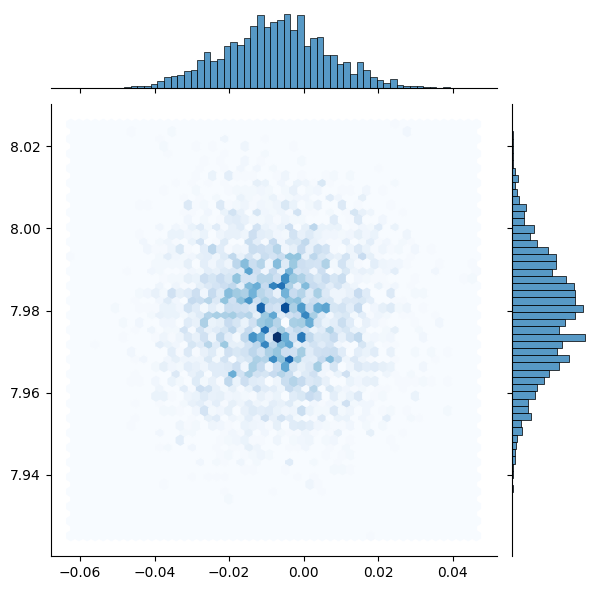

In [13]:
T = 100000
norm_2 = Norm_2_d_lkhd()
test_vanillMH = MetropolisHastings(bimodal_data, norm_2)
test_vanillMH.stepsize = 0.1
theta = np.array([5,18])
start_time = time.time()
test_vanillMH.run(T, theta, bimodal_data)
vanillMH_run = test_vanillMH.S
end_time = time.time()
ex_time_vanillaMH = end_time - start_time
print(f"Execution time: {ex_time_vanillaMH:.6f} seconds")
sample = create_sample(vanillMH_run,10000, 10)
plt_samples(sample)

In [18]:
num_batches = 4
T = 10000

consMH = ConsensusMH(bimodal_data, norm_2, num_batches)

start_time = time.time()
consMH_run = consMH.run(T, MAP)
consMH_sample = consMH.S
end_time = time.time()
ex_time_ConsMH = end_time - start_time
print(f"Execution time: {ex_time_ConsMH:.6f} seconds")
sample = create_sample(consMH_sample,10000, 10)
print(sample)
plt_samples(sample)

[array([[1.67345788, 2.29954417],
       [1.65357311, 2.3064413 ],
       [1.65357311, 2.3064413 ],
       ...,
       [0.02647285, 7.93834073],
       [0.02352738, 7.95573716],
       [0.01909752, 7.93006213]]), array([[ 1.67345788,  2.29954417],
       [ 1.65357311,  2.3064413 ],
       [ 1.65357311,  2.3064413 ],
       ...,
       [-0.01322889,  7.99310424],
       [-0.01617436,  8.01050067],
       [-0.02060422,  7.98482564]]), array([[ 1.67345788e+00,  2.29954417e+00],
       [ 1.65357311e+00,  2.30644130e+00],
       [ 1.65357311e+00,  2.30644130e+00],
       ...,
       [-7.86543247e-03,  7.92549024e+00],
       [-1.08109012e-02,  7.94288667e+00],
       [-1.52407600e-02,  7.91721164e+00]]), array([[ 1.67345788,  2.29954417],
       [ 1.65357311,  2.3064413 ],
       [ 1.65357311,  2.3064413 ],
       ...,
       [-0.02811361,  7.98178623],
       [-0.03105907,  7.99918265],
       [-0.03548893,  7.97350763]])]
Execution time: 0.524944 seconds


TypeError: 'NoneType' object is not subscriptable